# 우영우를 이겨라
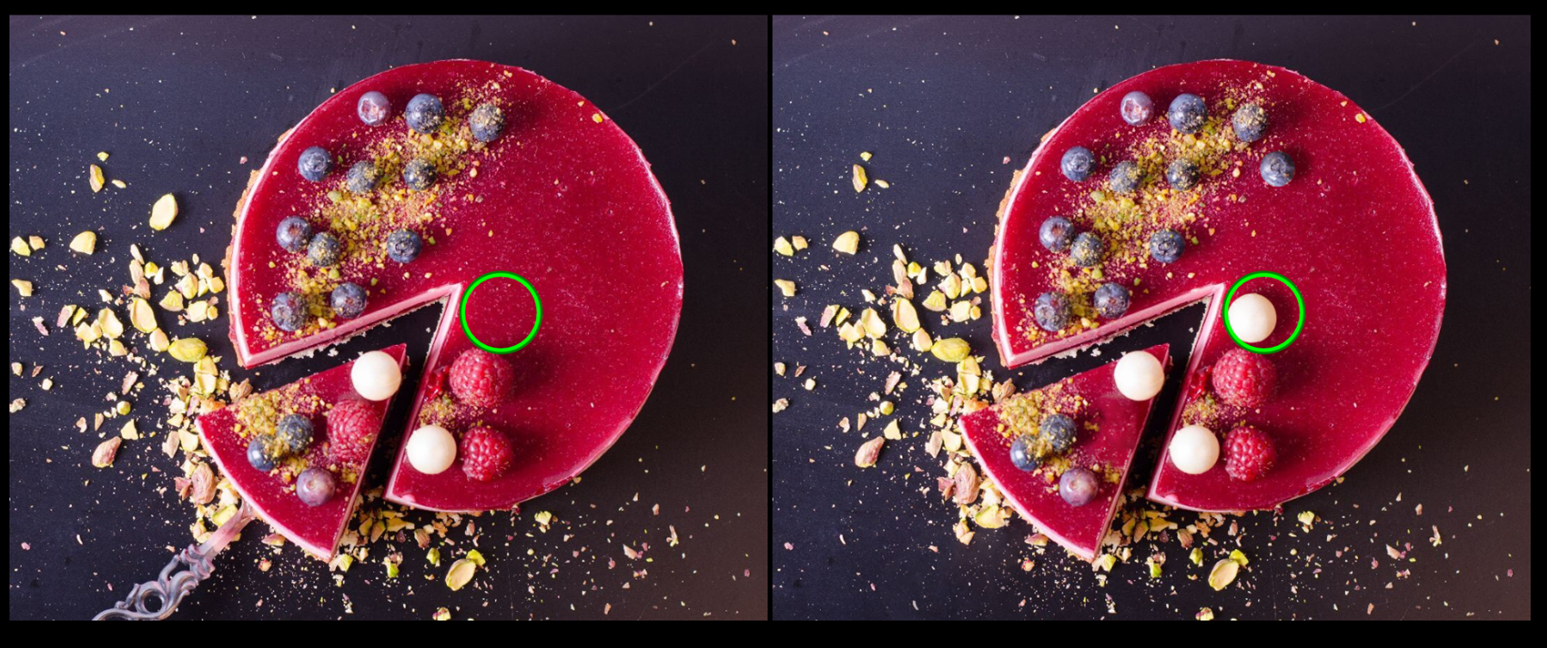
## 알고리즘
1. 블루스택에서 좌우이미지를 각각 잘라내서 스크린샷으로 저장
2. 두 이미지간에 서로 다른부분 찾아내기 , difference()
3. 이미지에서 다른 부분의 외곽선 디텍팅해서 사각형씌우기
4. 씌운 사각형의 가운데로 마우스를 자동으로 이동해서 클릭하게 해주기

필요한 모듈 임포트

In [2]:
import os, time
import pyautogui
from PIL import ImageChops
import cv2

좌우 그림 위치 및 크기 구하기

In [8]:
src_x = 45
dest_x = 933
y_pos = 84
width = 926 - src_x;
height = 788 - y_pos;     

In [ ]:
width

In [ ]:
height

좌우 이미지를 스크린샷

In [ ]:
src = pyautogui.screenshot(region=(src_x, y_pos, width, height))
src.save('src.jpg')

dest = pyautogui.screenshot(region=(dest_x, y_pos, width, height))
dest.save('dest.jpg') 

두이미지간에 서로 다른 부분 찾아내기

In [ ]:
diff = ImageChops.difference(src,dest)
diff.save('diff.jpg')

OpenCV 로 저장한 파일들 읽어오기

In [3]:
src_img = cv2.imread('src.jpg')
dest_img = cv2.imread('dest.jpg')
diff_img = cv2.imread('diff.jpg')

In [ ]:
src_img

이미지에서 서로다른부분 외곽선을 디텍팅하기 

In [4]:
gray = cv2.cvtColor(diff_img, cv2.COLOR_BGR2GRAY)
gray = (gray > 25) * gray
contours, _ = cv2.findContours(gray,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # RETR_EXTERNAL 외곽선 디텍팅

녹색사각형을 씌우기

In [ ]:
COLOR = (0, 200, 0) # Green
for cnt in contours:
    x, y, width, height  = cv2.boundingRect(cnt)
    cv2.rectangle(src_img, (x, y), (x + width, y + height), COLOR, 2)
    cv2.rectangle(dest_img, (x, y), (x + width, y + height), COLOR, 2)
    cv2.rectangle(diff_img, (x, y), (x + width, y + height), COLOR, 2)
cv2.imshow('src', src_img)
cv2.imshow('dest', dest_img)
cv2.imshow('diff', diff_img)

cv2.waitKey(0) #아무키나 누르면 창종료
cv2.destroyAllWindows()

작은 diff는 무시하기. 면적이 100px2 이상되는 윤곽선만 디텍팅
```
if cv2.contourArea(cnt) > 100:
```

In [6]:
COLOR = (0, 200, 0) # Green
for cnt in contours:
    if cv2.contourArea(cnt) > 100:
        x, y, width, height  = cv2.boundingRect(cnt)
        cv2.rectangle(src_img, (x, y), (x + width, y + height), COLOR, 2)
        cv2.rectangle(dest_img, (x, y), (x + width, y + height), COLOR, 2)
        cv2.rectangle(diff_img, (x, y), (x + width, y + height), COLOR, 2)
cv2.imshow('src', src_img)
cv2.imshow('dest', dest_img)
cv2.imshow('diff', diff_img)

cv2.waitKey(0) #아무키나 누르면 창종료
cv2.destroyAllWindows()

감지된 사각형 가운데만 클릭해주기
```
to_x = x + (width // 2) + src_x
to_y = y + (height // 2) + y_pos
pyautogui.moveTo(to_x,to_y,duration=0.15)
pyautogui.click()
```
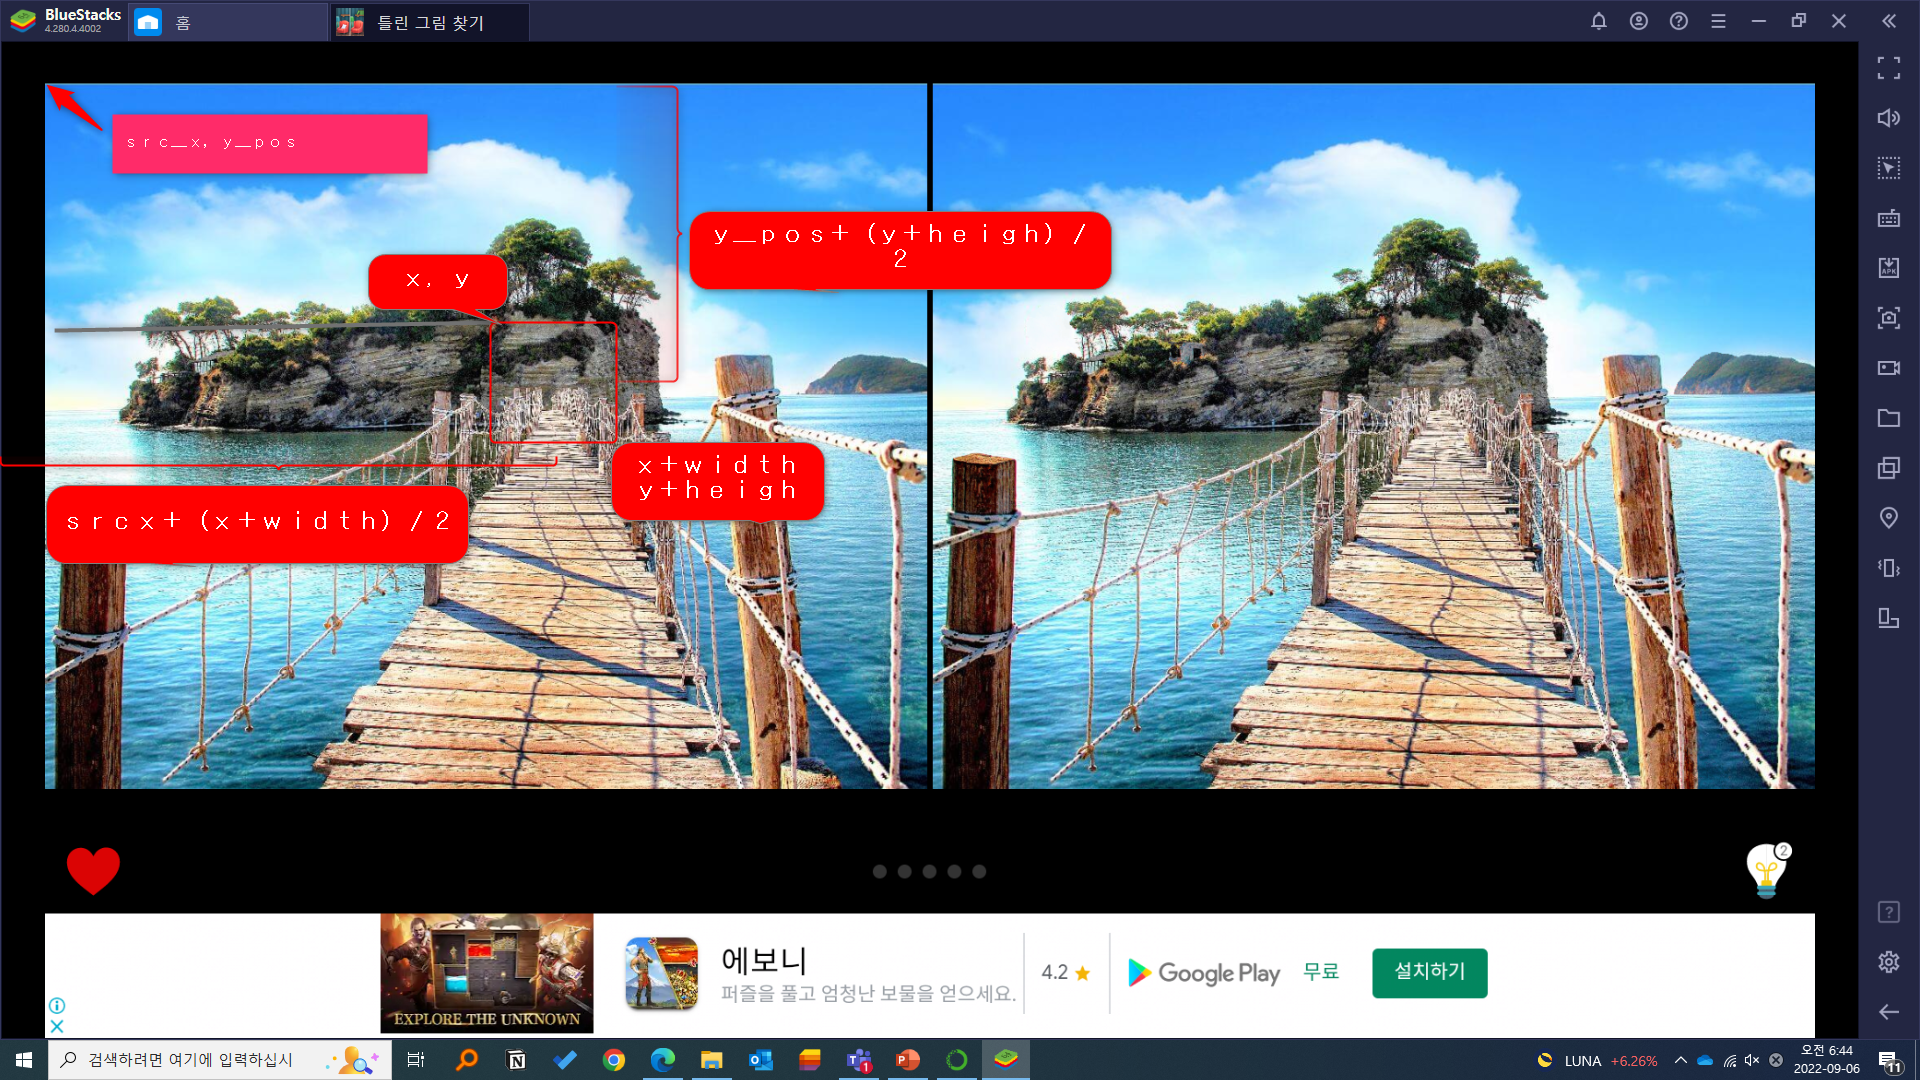

In [10]:
for cnt in contours:
    if cv2.contourArea(cnt) > 100:
        x, y, width, height  = cv2.boundingRect(cnt)
        cv2.rectangle(src_img, (x, y), (x + width, y + height), COLOR, 2)
        cv2.rectangle(dest_img, (x, y), (x + width, y + height), COLOR, 2)
        cv2.rectangle(diff_img, (x, y), (x + width, y + height), COLOR, 2)
        
        to_x = x + (width // 2) + src_x
        to_y = y + (height // 2) + y_pos
        pyautogui.moveTo(to_x,to_y,duration=0.5)
        # time.sleep(1)
        pyautogui.click()
        
cv2.imshow('src', src_img)
cv2.imshow('dest', dest_img)
cv2.imshow('diff', diff_img)

cv2.waitKey(0) #아무키나 누르면 창종료
cv2.destroyAllWindows()

# 한방에 실행하는코드

In [12]:
import os, time
import pyautogui
from PIL import ImageChops
import cv2

while(True):
    result = pyautogui.confirm('우영우를 이겨라', buttons=['시작','종료'])
    if result == '종료':
        break;
        
    # 캡쳐할 좌표 구하기
    src_x = 45
    dest_x = 933
    y_pos = 84
    width = dest_x - src_x;
    height = 788 - y_pos;        
    
    src = pyautogui.screenshot(region=(src_x, y_pos, width, height))
    src.save('src.jpg')

    dest = pyautogui.screenshot(region=(dest_x, y_pos, width, height))
    dest.save('dest.jpg') 

    # 차이점 비교
    diff = ImageChops.difference(src,dest)
    diff.save('diff.jpg')

    # 다른영역 외곽선 찾기
    # 파일 생성 대기
    while not os.path.exists('diff.jpg'):
        time.sleep(1)

    src_img = cv2.imread('src.jpg')
    dest_img = cv2.imread('dest.jpg')
    diff_img = cv2.imread('diff.jpg')
    gray = cv2.cvtColor(diff_img, cv2.COLOR_BGR2GRAY)
    gray = (gray > 25) * gray
    contours, _ = cv2.findContours(gray,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # RETR_EXTERNAL 외곽선 디텍팅

    COLOR = (0, 200, 0) # Green

    # 다른부분 사각형으로 씌우기
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            x, y, width, height  = cv2.boundingRect(cnt)

            to_x = x + (width // 2) + src_x
            to_y = y + (height // 2) + y_pos
            pyautogui.moveTo(to_x,to_y,duration=0.5)
            pyautogui.click()